In [2]:
#Importar Libreria
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Importar base de datos
df = pd.read_csv("supermarket_sales.csv")


In [5]:
#Trabajar directamente con Numpy
unit_price = df['Unit price'].to_numpy()
quantity = df['Quantity'].to_numpy()
total = df['Total'].to_numpy()
rating = df['Rating'].to_numpy()


In [9]:
#estadística descriptiva básica en las columnas unit_price y quantity: Cálculo de la media, mediana, moda
print("=== Estadística Descriptiva ===")
print(f"Unit Price -> Media: {np.mean(unit_price):.2f}, Mediana: {np.median(unit_price):.2f}, Moda: {stats.mode(unit_price, keepdims=True).mode[0]:.2f}")
print(f"Quantity -> Media: {np.mean(quantity):.2f}, Mediana: {np.median(quantity):.2f}, Moda: {stats.mode(quantity, keepdims=True).mode[0]:.2f}")


=== Estadística Descriptiva ===
Unit Price -> Media: 55.67, Mediana: 55.23, Moda: 83.77
Quantity -> Media: 5.51, Mediana: 5.00, Moda: 10.00


In [11]:
# por ciudad
ticket_ciudad = df.groupby('City')['Total'].mean()
print("\n=== Ticket promedio por ciudad ===")
print(ticket_ciudad)


=== Ticket promedio por ciudad ===
City
Mandalay     319.872506
Naypyitaw    337.099715
Yangon       312.354031
Name: Total, dtype: float64


In [12]:
# por product line y ciudad
ticket_producto_ciudad = df.groupby(['City','Product line'])['Total'].mean()
print("\n=== Ticket promedio por product line y ciudad ===")
print(ticket_producto_ciudad)


=== Ticket promedio por product line y ciudad ===
City       Product line          
Mandalay   Electronic accessories    310.026245
           Fashion accessories       264.730911
           Food and beverages        304.297770
           Health and beauty         376.993585
           Home and lifestyle        350.983290
           Sports and travel         322.390306
Naypyitaw  Electronic accessories    344.890445
           Fashion accessories       331.693385
           Food and beverages        360.103864
           Health and beauty         319.525500
           Home and lifestyle        308.790067
           Sports and travel         350.265067
Yangon     Electronic accessories    305.285225
           Fashion accessories       320.245265
           Food and beverages        295.915526
           Health and beauty         268.037298
           Home and lifestyle        344.879931
           Sports and travel         328.350839
Name: Total, dtype: float64


In [13]:
# por genero
ticket_genero = df.groupby('Gender')['Total'].mean()
print("\n=== Ticket promedio por género ===")
print(ticket_genero)


=== Ticket promedio por género ===
Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


In [14]:
# por genero y product line
ticket_genero_producto = df.groupby(['Gender','Product line'])['Total'].mean()
print("\n=== Ticket promedio por género y product line ===")
print(ticket_genero_producto)


=== Ticket promedio por género y product line ===
Gender  Product line          
Female  Electronic accessories    322.643125
        Fashion accessories       317.056250
        Food and beverages        368.565750
        Health and beauty         290.015414
        Home and lifestyle        380.213639
        Sports and travel         324.712739
Male    Electronic accessories    316.691965
        Fashion accessories       291.079207
        Food and beverages        273.499125
        Health and beauty         348.099460
        Home and lifestyle        294.136241
        Sports and travel         340.360327
Name: Total, dtype: float64


In [15]:
# rank 5 ventas por ciudad
ventas_ciudad = df.groupby('City')['Total'].sum().sort_values(ascending=False)
top5_ciudad = ventas_ciudad.head(5)
aporte_ciudad = (top5_ciudad / total.sum()) * 100

print("\n=== Top 5 ventas por ciudad ===")
print(top5_ciudad)
print("\n% aporte:")
print(aporte_ciudad)


=== Top 5 ventas por ciudad ===
City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

% aporte:
City
Naypyitaw    34.235322
Yangon       32.882757
Mandalay     32.881921
Name: Total, dtype: float64


In [17]:
# rank 5 ventas por member
ventas_member = df.groupby('Customer type')['Total'].sum().sort_values(ascending=False)
aporte_member = (ventas_member / total.sum()) * 100

print("\n=== Ventas por tipo de cliente ===")
print(ventas_member)
print("\n% aporte:")
print(aporte_member)


=== Ventas por tipo de cliente ===
Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

% aporte:
Customer type
Member    50.848406
Normal    49.151594
Name: Total, dtype: float64


In [16]:
# rank 5 ventas por payment / porcentaje de aporte de cada categoría
ventas_payment = df.groupby('Payment')['Total'].sum().sort_values(ascending=False)
aporte_payment = (ventas_payment / total.sum()) * 100

print("\n=== Ventas por método de pago ===")
print(ventas_payment)
print("\n% aporte:")
print(aporte_payment)


=== Ventas por método de pago ===
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64

% aporte:
Payment
Cash           34.742453
Ewallet        34.057099
Credit card    31.200448
Name: Total, dtype: float64


In [18]:
# correlación entre horas
horas = pd.to_datetime(df['Time']).dt.hour.to_numpy()
correlacion_hora_total = np.corrcoef(horas, total)[0,1]
print(f"\nCorrelación entre hora y total: {correlacion_hora_total:.4f}")


Correlación entre hora y total: -0.0028


C:\Users\Rafael\AppData\Local\Temp\ipykernel_17228\1396276516.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  horas = pd.to_datetime(df['Time']).dt.hour.to_numpy()


In [19]:
# correlación entre unit price & rating
correlacion_precio_rating = np.corrcoef(unit_price, rating)[0,1]
print(f"Correlación entre unit price y rating: {correlacion_precio_rating:.4f}")

Correlación entre unit price y rating: -0.0088


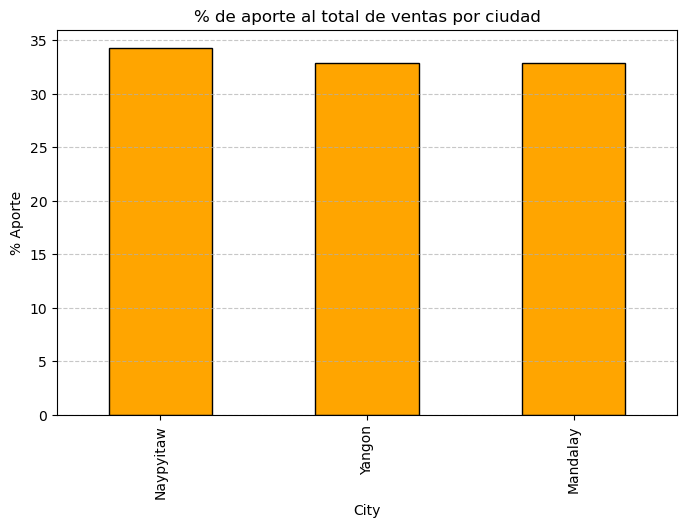

In [21]:
# garfico de barras % aporte por ciudad
plt.figure(figsize=(8,5))
aporte_ciudad.plot(kind='bar', color='orange', edgecolor='black')
plt.ylabel('% Aporte')
plt.title('% de aporte al total de ventas por ciudad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


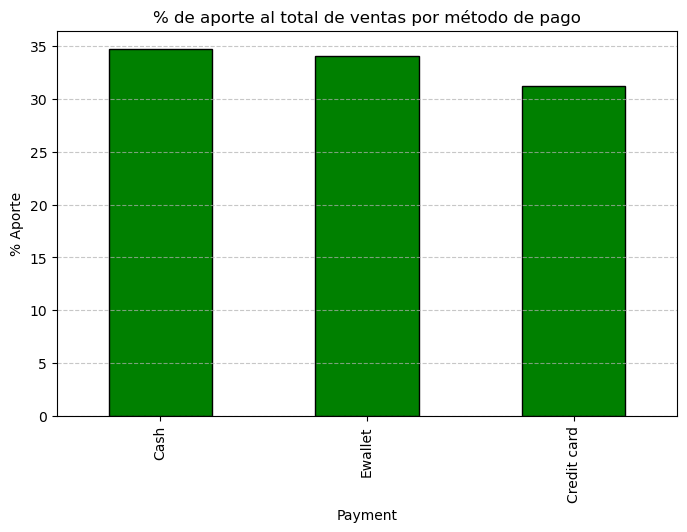

In [22]:
## grafico de aporte  por metodo de pago
plt.figure(figsize=(8,5))
aporte_payment.plot(kind='bar', color='green', edgecolor='black')
plt.ylabel('% Aporte')
plt.title('% de aporte al total de ventas por método de pago')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

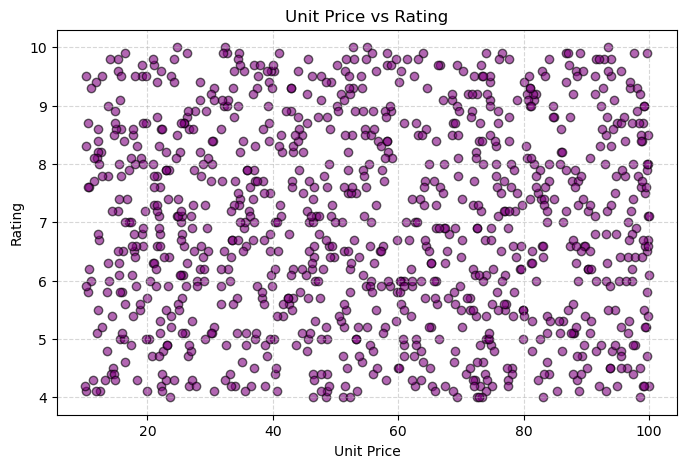

In [26]:
# unit price vs rating

plt.figure(figsize=(8,5))
plt.scatter(unit_price, rating, alpha=0.6, color='purple', edgecolor='black')
plt.xlabel('Unit Price')
plt.ylabel('Rating')
plt.title('Unit Price vs Rating')
plt.grid(linestyle='--', alpha=0.5)
plt.show()
